In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\nabhe\\Downloads\\archive (23)\\Train.csv")

In [3]:
# Basic structure
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape: (8068, 11)
Columns: ['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation']


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
# Data types and memory usage
df.info()

# Missing values
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

# Exact duplicate rows
n_dup = df.duplicated().sum()
print("Exact duplicates:", n_dup)
df = df.drop_duplicates()

# If you have a unique ID column, also check ID-level duplicates:
if "ID" in df.columns:
    dup_ids = df.duplicated(subset=["ID"]).sum()
    print("Duplicate IDs:", dup_ids)
    # Example policy (keep first):
    df = df.drop_duplicates(subset=["ID"], keep="first")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
Missing values:
 Ever_Married       140
Graduated           78
Profession         124
Work_Experience    829
Family_Size        335
Var_1               76
dtype: int64
Exact duplicates: 0
Duplicate IDs: 0


In [12]:
# Numerical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8068.0,463479.214551,2595.381232,458982.0,461240.75,463472.5,465744.25,467974.0
Age,8068.0,43.466906,16.711696,18.0,30.00,40.0,53.00,89.0
Work_Experience,8068.0,2.472980,3.265248,0.0,0.00,1.0,4.00,14.0
Family_Size,8068.0,2.856346,1.499577,1.0,2.00,3.0,4.00,9.0


In [16]:
# Mode, median, variance (numerical variables)
print("Mode:\n", df.mode(numeric_only=True))
print("Median:\n", df.median(numeric_only=True))
print("Variance:\n", df.var(numeric_only=True))

Mode:
           ID   Age  Work_Experience  Family_Size
0     458982  35.0              1.0          2.0
1     458983   NaN              NaN          NaN
2     458984   NaN              NaN          NaN
3     458985   NaN              NaN          NaN
4     458986   NaN              NaN          NaN
...      ...   ...              ...          ...
8063  467969   NaN              NaN          NaN
8064  467971   NaN              NaN          NaN
8065  467972   NaN              NaN          NaN
8066  467973   NaN              NaN          NaN
8067  467974   NaN              NaN          NaN

[8068 rows x 4 columns]
Median:
 ID                 463472.5
Age                    40.0
Work_Experience         1.0
Family_Size             3.0
dtype: float64
Variance:
 ID                 6.736004e+06
Age                2.792808e+02
Work_Experience    1.066185e+01
Family_Size        2.248730e+00
dtype: float64


In [18]:
# Getting rid of missing values by adding median/mode/Unknown values

# 1) Work_Experience → median
if "Work_Experience" in df.columns:
    df["Work_Experience"] = df["Work_Experience"].fillna(df["Work_Experience"].median())

# 2) Family_Size → median
if "Family_Size" in df.columns:
    df["Family_Size"] = df["Family_Size"].fillna(df["Family_Size"].median())

# 3) Ever_Married → mode
if "Ever_Married" in df.columns:
    mode_em = df["Ever_Married"].mode(dropna=True)
    if not mode_em.empty:
        df["Ever_Married"] = df["Ever_Married"].fillna(mode_em.iloc[0])

# 4) Profession → "Unknown"
if "Profession" in df.columns:
    df["Profession"] = df["Profession"].fillna("Unknown")

# 5) Graduated → mode
if "Graduated" in df.columns:
    mode_grad = df["Graduated"].mode(dropna=True)
    if not mode_grad.empty:
        df["Graduated"] = df["Graduated"].fillna(mode_grad.iloc[0])

# Var_1 → "Unknown"
df["Var_1"] = df["Var_1"].fillna("Unknown")

# (Optional) verify no missing left in handled columns
print(df[["Work_Experience","Family_Size","Ever_Married","Profession","Graduated","Var_1"]]
      .isna().sum())

# Save cleaned dataset
df.to_csv("dataset_cleaned.csv", index=False)
print("Saved to dataset_cleaned.csv")


Work_Experience    0
Family_Size        0
Ever_Married       0
Profession         0
Graduated          0
Var_1              0
dtype: int64
Saved to dataset_cleaned.csv


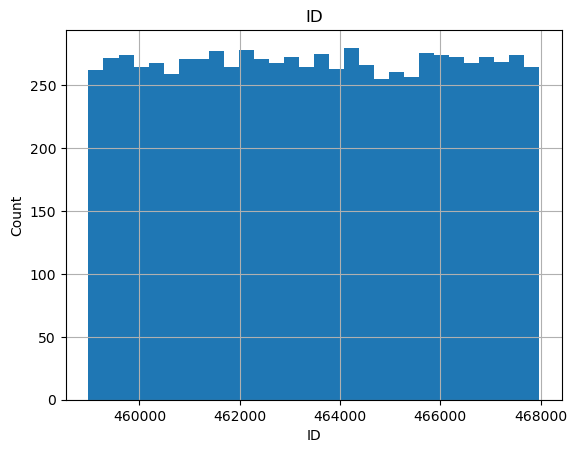

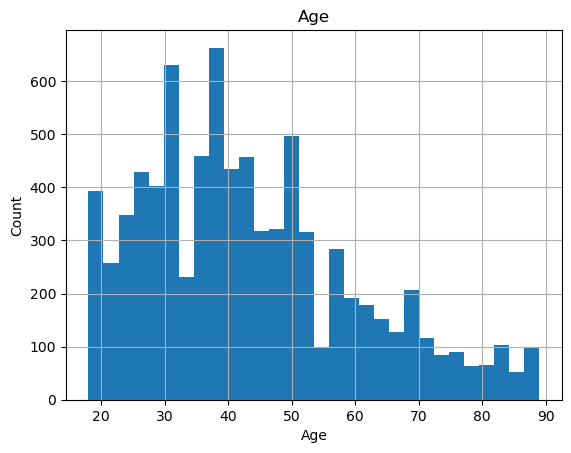

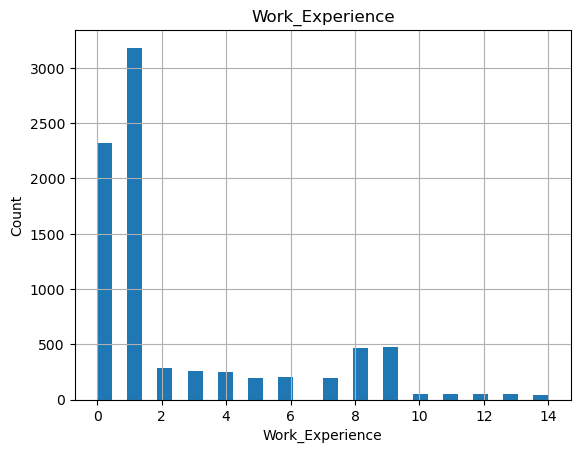

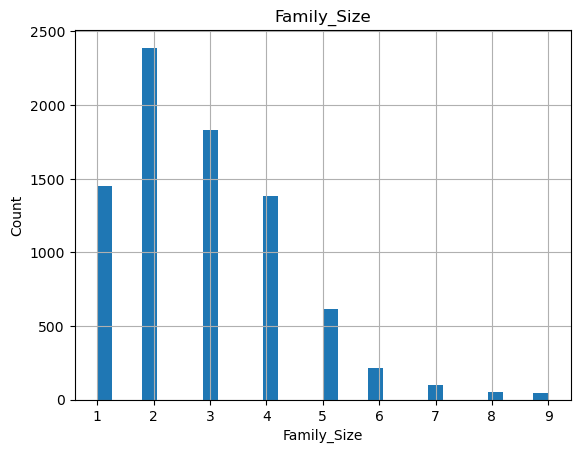

In [7]:
# Numeric histograms
num_cols = df.select_dtypes(include="number").columns
for c in num_cols:
    df[c].hist(bins=30)
    plt.title(c)
    plt.xlabel(c); plt.ylabel("Count")
    plt.show()


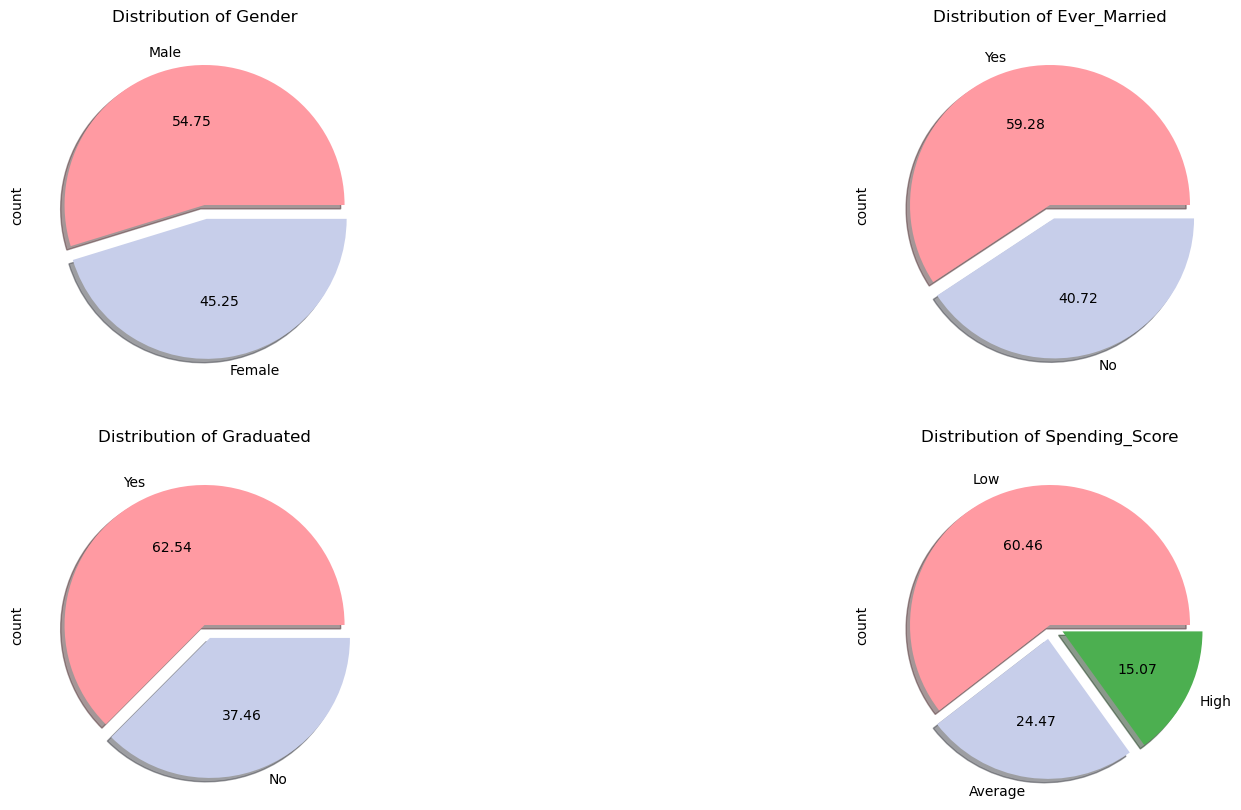

In [28]:
# Categorical variables with less number(<=3) of unique values
f, ax  = plt.subplots(2,2,figsize = (20,10))
#colors=["#2E86AB", "#A23B72","#FFD700"]
colors=["#FF9AA2", "#C7CEEA", "#4CAF50"]
df['Gender'].value_counts().plot.pie(title='Distribution of Gender',explode=[0,.1],
                                           ax=ax[0][0],autopct="%.2f",shadow = True,colors = colors)

df['Ever_Married'].value_counts().plot.pie(title='Distribution of Ever_Married',explode=[0,.1],
                                                 ax=ax[0][1],autopct="%.2f",shadow = True,colors = colors)

df['Graduated'].value_counts().plot.pie(title='Distribution of Graduated',explode=[0,.1],
                                              ax=ax[1][0],autopct="%.2f",shadow = True,colors = colors)

df['Spending_Score'].value_counts().plot.pie(title='Distribution of Spending_Score',
                                                   ax=ax[1][1],explode=[0,.1,.1],autopct="%.2f",shadow = True,colors=colors)
f.patch.set_facecolor('white')
plt.show()

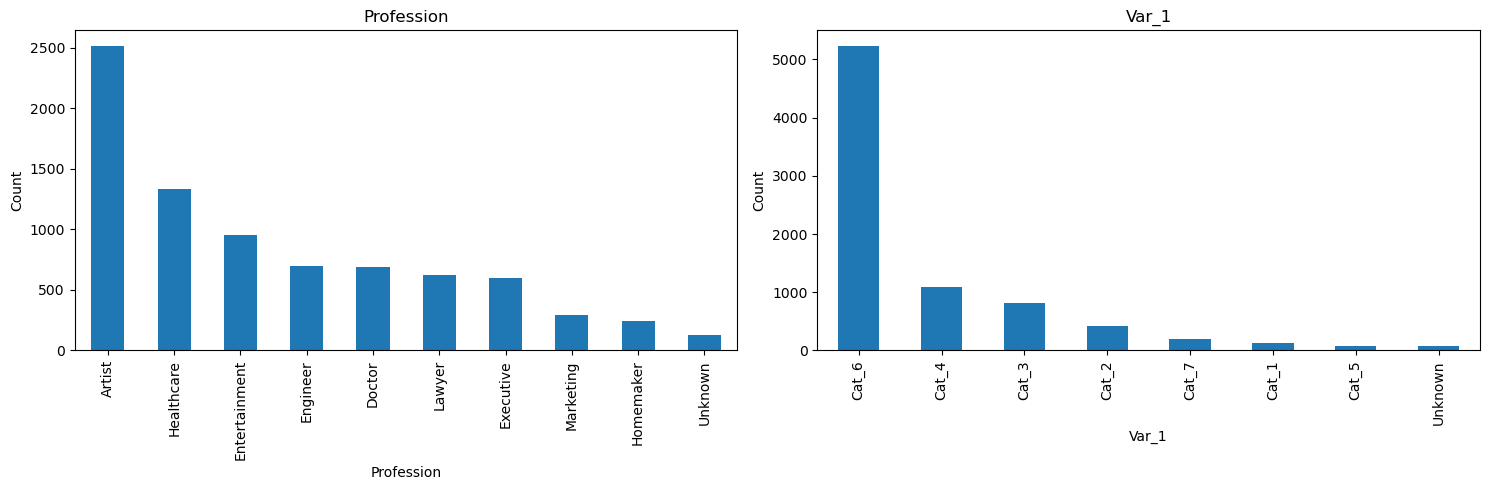

In [26]:
# Categorical bar charts for specific columns from remaining categorical variables (top 10)
specific_cols = ['Profession', 'Var_1']

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, c in enumerate(specific_cols):
    if c in df.columns:  # Check if column exists
        df[c].value_counts().head(10).plot(kind="bar", ax=axes[i])
        axes[i].set_title(f"{c}")
        axes[i].set_xlabel(c)
        axes[i].set_ylabel("Count")
    else:
        print(f"Column '{c}' not found in dataframe")

plt.tight_layout()
plt.show()